In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import cv2

In [ ]:
path = "/content/drive/MyDrive/90/UTKFace"
files = os.listdir(path)
size = len(files)
print(size)
files[0]


images = []
ages = []
genders = []
# Load the image
for file in files:

  image_path = os.path.join(path, file)
  image = Image.open(image_path)

# Check if the image was successfully loaded
  if image is not None:
    image = image.resize((64,64))
    images.append(image)
    split_var = file.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]))
    # Display the image
  else:
      print('Failed to load the image.')


23708


In [ ]:
files[1]

'80_0_1_20170111205416943.jpg.chip.jpg'

In [ ]:
len(images)

23708

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
len(images)

23708

Gender: 0 Age: 50


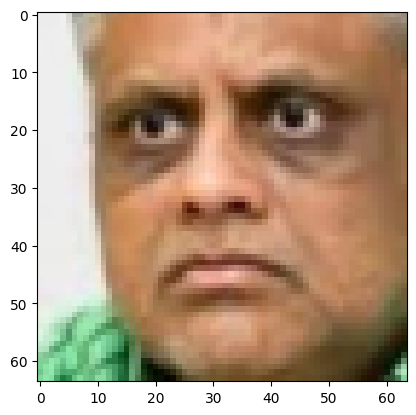

In [ ]:
def des_imag(image):
  image_array = np.array(image)

  plt.imshow(image_array)
  plt.show()
idx = 5333
sample = images[idx]
print("Gender:",genders[idx],"Age:",ages[idx])
des_imag(sample)

23708

In [ ]:
def age_catego(age):
  if age>0 and age < 18:
    return 1
  elif age < 30:
    return 2
  elif age<60:
    return 3
  elif age <80:
    return 4
  else:
    return 5

In [ ]:
target = np.zeros((size, 2), dtype='float32')
feature = np.zeros((size, 64, 64,3), dtype='uint8')

for i in range(size):
    target[i, 0] = age_catego(int(ages[i])) / 4
    target[i, 1] = int(genders[i])
    feature[i] = images[i]

feature = feature.astype('float32') / 255.0



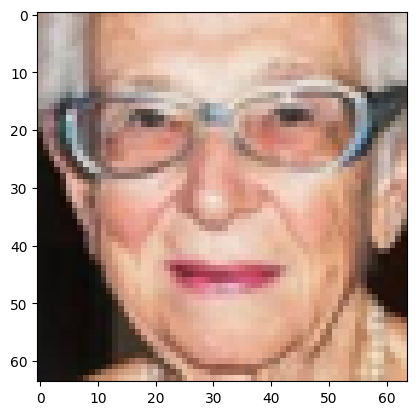

In [ ]:
des_imag(feature[55])

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.21, shuffle=True)

In [ ]:
train_x.shape

(18729, 64, 64, 3)

In [ ]:
test_x.shape

(4979, 64, 64, 3)

In [ ]:
train_y.shape, train_x.shape

((18729, 2), (18729, 64, 64, 3))

In [ ]:
train_x.shape

(18729, 64, 64, 3)

In [ ]:
from keras.models import *
from keras.layers import *
from keras import backend as k


In [ ]:
inputs = Input(shape=(64,64,3))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)

dropout = Dropout(0.5)
age_model = Dense(128, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(64, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(1, activation='relu')(age_model)

dropout = Dropout(0.5)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(1, activation='sigmoid')(gender_model)

In [ ]:
model = Model(inputs=inputs, outputs=[age_model, gender_model])
model.compile(optimizer='adam', loss=['mse','binary_crossentropy'], metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 62, 62, 32)   896         ['input_2[0][0]']                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 60, 60, 64)   18496       ['conv2d_3[0][0]']               
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 30, 30, 64)  0           ['conv2d_4[0][0]']               
                                                                                            

In [ ]:
history = model.fit(train_x, [train_y[:, 0],train_y[:, 1]], validation_data=(test_x, [test_y[:, 0], test_y[:, 1]]), epochs=25, batch_size=128)

Epoch 1/25
147/147 [==============================] - 577s 4s/step - loss: 0.9146 - dense_3_loss: 0.2204 - dense_9_loss: 0.6942 - dense_3_accuracy: 0.0315 - dense_9_accuracy: 0.5155 - val_loss: 0.7506 - val_dense_3_loss: 0.0597 - val_dense_9_loss: 0.6909 - val_dense_3_accuracy: 0.0777 - val_dense_9_accuracy: 0.5222
Epoch 2/25
147/147 [==============================] - 568s 4s/step - loss: 0.7267 - dense_3_loss: 0.0743 - dense_9_loss: 0.6524 - dense_3_accuracy: 0.0593 - dense_9_accuracy: 0.5771 - val_loss: 0.5986 - val_dense_3_loss: 0.0397 - val_dense_9_loss: 0.5588 - val_dense_3_accuracy: 0.0825 - val_dense_9_accuracy: 0.7901
Epoch 3/25
147/147 [==============================] - 557s 4s/step - loss: 0.5885 - dense_3_loss: 0.0620 - dense_9_loss: 0.5265 - dense_3_accuracy: 0.0681 - dense_9_accuracy: 0.7665 - val_loss: 0.4078 - val_dense_3_loss: 0.0365 - val_dense_9_loss: 0.3714 - val_dense_3_accuracy: 0.0823 - val_dense_9_accuracy: 0.8474
Epoch 4/25
147/147 [=============================

In [ ]:
len(images)

23708

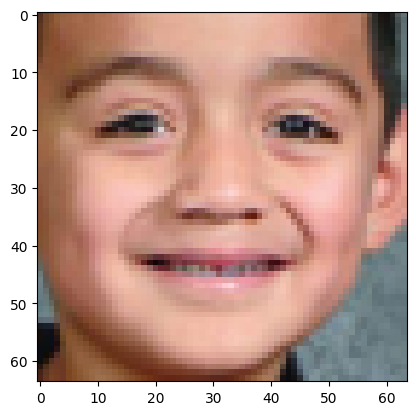

Actual Gender: Male Age: 8
1/1 [==============================] - 0s 36ms/step
Values: [array([[0.12254261]], dtype=float32), array([[0.49745834]], dtype=float32)] 
Predicted Gender: Male Predicted Age: Unknown


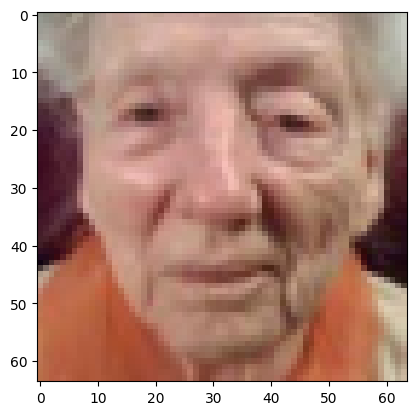

Actual Gender: Female Age: 81
1/1 [==============================] - 0s 33ms/step
Values: [array([[0.12759489]], dtype=float32), array([[0.49753854]], dtype=float32)] 
Predicted Gender: Male Predicted Age: Unknown


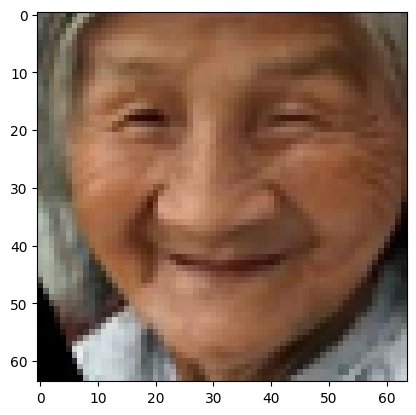

Actual Gender: Female Age: 80
1/1 [==============================] - 0s 31ms/step
Values: [array([[0.09374689]], dtype=float32), array([[0.49814796]], dtype=float32)] 
Predicted Gender: Male Predicted Age: Unknown


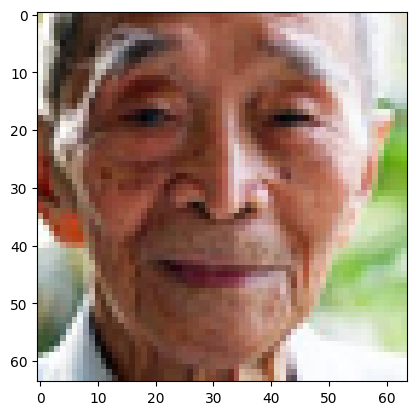

Actual Gender: Male Age: 80
1/1 [==============================] - 0s 31ms/step
Values: [array([[0.15126613]], dtype=float32), array([[0.49762744]], dtype=float32)] 
Predicted Gender: Male Predicted Age: Unknown


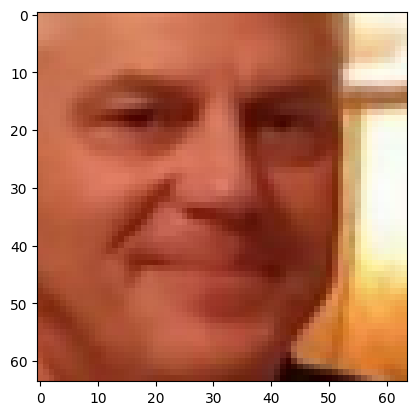

Actual Gender: Male Age: 55
1/1 [==============================] - 0s 39ms/step
Values: [array([[0.12049365]], dtype=float32), array([[0.49916506]], dtype=float32)] 
Predicted Gender: Male Predicted Age: Unknown


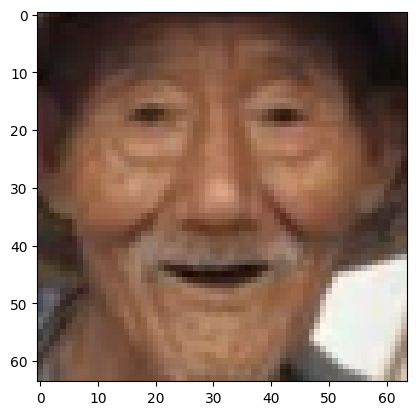

Actual Gender: Male Age: 80
1/1 [==============================] - 0s 30ms/step
Values: [array([[0.10489734]], dtype=float32), array([[0.4986419]], dtype=float32)] 
Predicted Gender: Male Predicted Age: Unknown


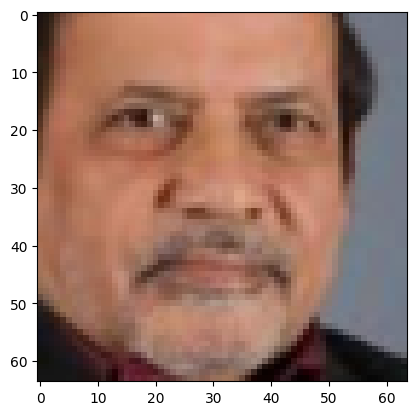

Actual Gender: Male Age: 80
1/1 [==============================] - 0s 30ms/step
Values: [array([[0.1123282]], dtype=float32), array([[0.49821526]], dtype=float32)] 
Predicted Gender: Male Predicted Age: Unknown


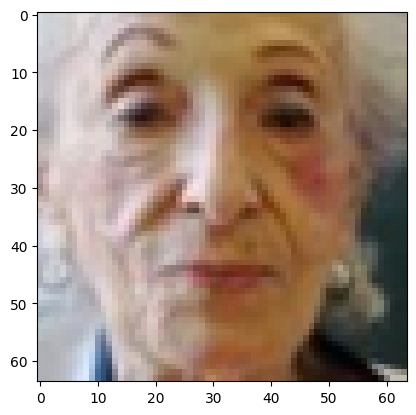

Actual Gender: Female Age: 85
1/1 [==============================] - 0s 30ms/step
Values: [array([[0.13529247]], dtype=float32), array([[0.49921143]], dtype=float32)] 
Predicted Gender: Male Predicted Age: Unknown


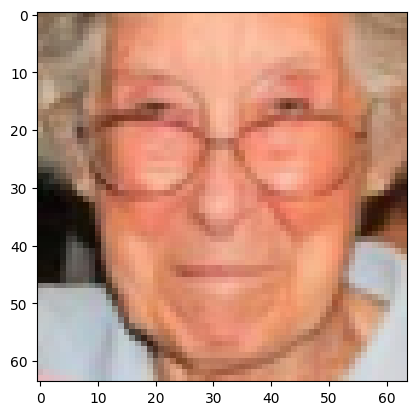

Actual Gender: Female Age: 80
1/1 [==============================] - 0s 31ms/step
Values: [array([[0.10387179]], dtype=float32), array([[0.49821082]], dtype=float32)] 
Predicted Gender: Male Predicted Age: Unknown


In [ ]:
def display(img):
    img_rgb = img.convert("RGB")

    # Convert the RGB image to a NumPy array
    img_array = np.array(img_rgb)

    # Display the RGB image
    plt.imshow(img_array)
    plt.show()
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

def get_age(distr):
    distr = distr*4
    if distr >= 0.65 and distr <= 1.4:return "0-18"
    if distr >= 1.65 and distr <= 2.4:return "19-30"
    if distr >= 2.65 and distr <= 3.4:return "31-80"
    if distr >= 3.65 and distr <= 4.4:return "80 +"
    return "Unknown"

def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
     sample_array = np.asarray(sample) / 255.0
     val = model.predict( np.array([ sample_array ]) )
     age = get_age(val[0])
     gender = get_gender(val[1])
     print("Values:",val,"\nPredicted Gender:",gender,"Predicted Age:",age)


indexes = [500,59,80,2,4546,7,9,256,45]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender:",get_gender(genders[idx]),"Age:",ages[idx])
    res = get_result(sample)

In [ ]:
len(images)

23708

In [ ]:
def display(img):
    img_rgb = img.convert("RGB")

    # Convert the RGB image to a NumPy array
    img_array = np.array(img_rgb)

    # Display the RGB image
    plt.imshow(img_array)
    plt.show()
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

In [ ]:
def get_age(distr):
    distr = distr*4
    if distr >= 0.65 and distr <= 1.4:return "0-18"
    if distr >= 1.65 and distr <= 2.4:return "19-30"
    if distr >= 2.65 and distr <= 3.4:return "31-80"
    if distr >= 3.65 and distr <= 4.4:return "80 +"
    return "Unknown"

In [ ]:
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
     sample_array = np.asarray(sample) / 255.0
     val = model.predict( np.array([ sample_array ]) )
     age = get_age(val[0])
     gender = get_gender(val[1])


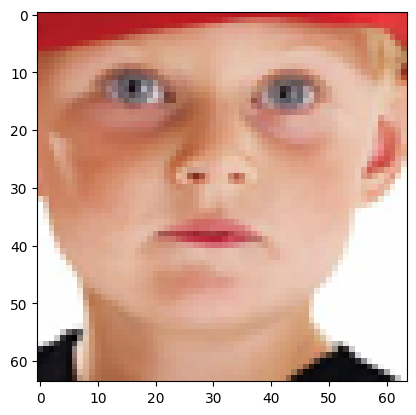

Actual Gender: Male Age: 5
1/1 [==============================] - 0s 40ms/step


TypeError: ignored

In [ ]:
idx = 3465
sample = images[idx]
display(sample)
print("Actual Gender:",get_gender(genders[idx]),"Age:",ages[idx])
res = get_result(sample)
print("Predicted Gender:", res[1], "Predicted Age:", res[0])

In [ ]:
model.save('AGE_GENDER.h5')

In [ ]:
from keras.models import load_model
model = load_model('AGE_GENDER.h5')

In [ ]:
def preprocess_image(image_path):

    image = Image.open(image_path)
    image = image.resize((64, 64))
    image_array = np.array(image)
    preprocessed_image = np.expand_dims(image_array, axis=0)

    preprocessed_image = preprocessed_image.astype('float32') / 255.0

    return preprocessed_image

In [ ]:
def get_result(sample):
     sample_array = np.asarray(sample) / 255.0
     val = model.predict(preprocessed_image)
     age = get_age(val[0])
     gender = get_gender(val[1])

In [ ]:
preprocess_image('/content/drive/MyDrive/90/UTKFace/100_1_2_20170112222336458.jpg.chip.jpg')

array([[[[0.65882355, 0.39607844, 0.12156863],
         [0.6784314 , 0.42745098, 0.14117648],
         [0.6509804 , 0.40392157, 0.11372549],
         ...,
         [0.3882353 , 0.3019608 , 0.24705882],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.6666667 , 0.40392157, 0.12941177],
         [0.6666667 , 0.41568628, 0.1254902 ],
         [0.654902  , 0.40784314, 0.11764706],
         ...,
         [0.39607844, 0.3137255 , 0.25490198],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.6862745 , 0.42352942, 0.14901961],
         [0.67058825, 0.41960785, 0.13333334],
         [0.6627451 , 0.41568628, 0.12156863],
         ...,
         [0.41568628, 0.33333334, 0.27450982],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.40392157, 0.21176471, 0.04313726],
         [0.4392157 , 0.23137255, 0.03921569]

In [ ]:
def test_age_gender_image(image_path):
  preprocessed_image = preprocess_image(image_path)

  age_pred, gender_pred  = model.predict(preprocessed_image)
  age_label = get_age(age_pred)
  gender_label = get_gender(gender_pred)

  return age_label, gender_label

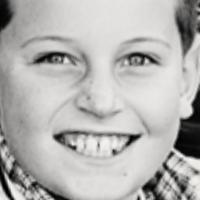

In [ ]:
Image.open('/content/drive/MyDrive/90/UTKFace/10_0_0_20170110220447314.jpg.chip.jpg')

In [ ]:
image_path = '/content/drive/MyDrive/90/UTKFace/10_0_0_20170110220447314.jpg.chip.jpg'

age_prediction, gender_prediction = test_age_gender_image(image_path)
print('Age_prediction:', age_prediction)
print('Gender_prediction:', gender_prediction)

1/1 [==============================] - 0s 33ms/step
Age_prediction: Unknown
Gender_prediction: Male
